# Task 10: Python EDA – Summary & Outlier Detection

This notebook performs Exploratory Data Analysis (EDA) on the USA Housing Dataset and detects outliers using the IQR method.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:

# Load dataset
df = pd.read_csv("USA Housing Dataset.csv")

# Basic checks
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [5]:

# Shape and info
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [6]:

# Descriptive statistics
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [7]:

# Missing value percentage
(df.isnull().mean() * 100)


,0
date,0.0
price,0.0
bedrooms,0.0
bathrooms,0.0
sqft_living,0.0
sqft_lot,0.0
floors,0.0
waterfront,0.0
view,0.0
condition,0.0


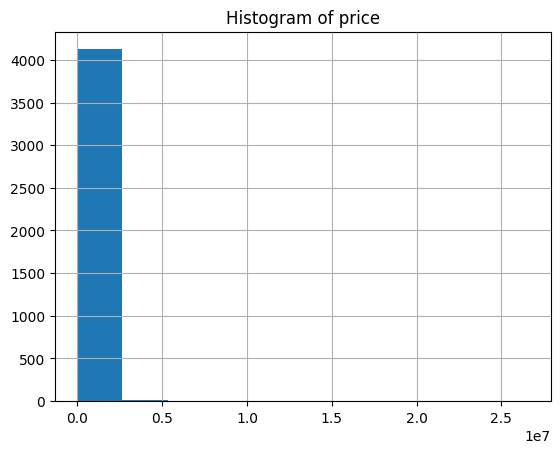

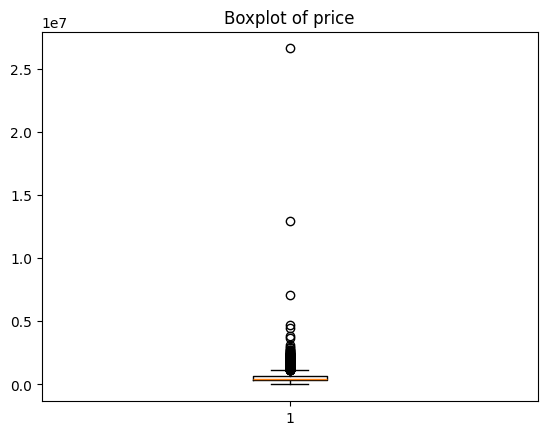

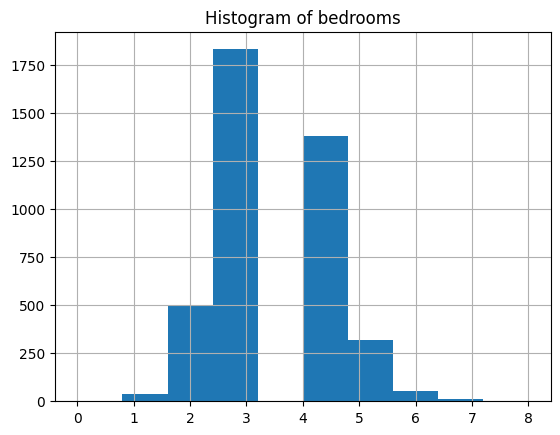

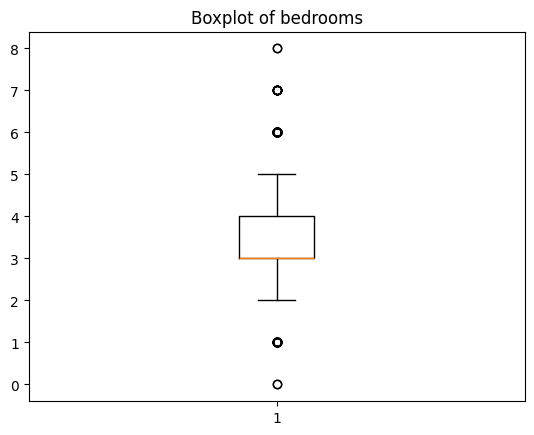

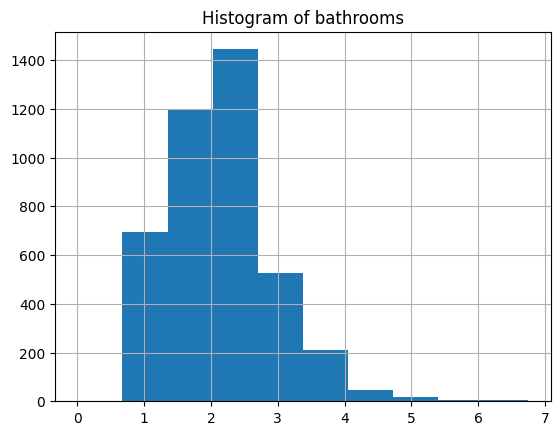

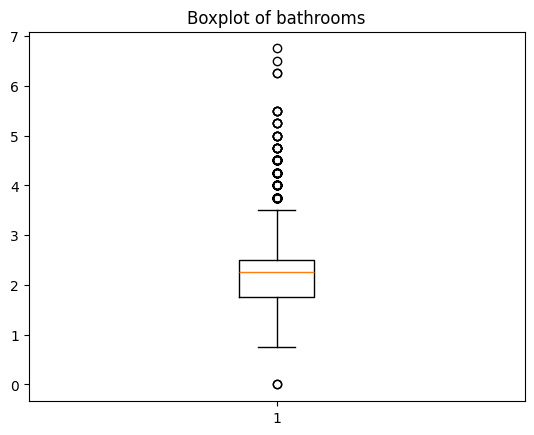

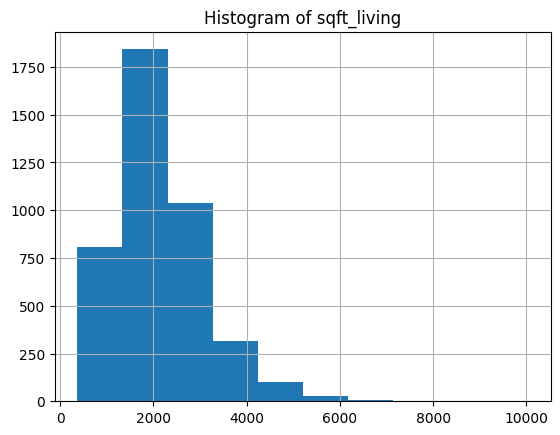

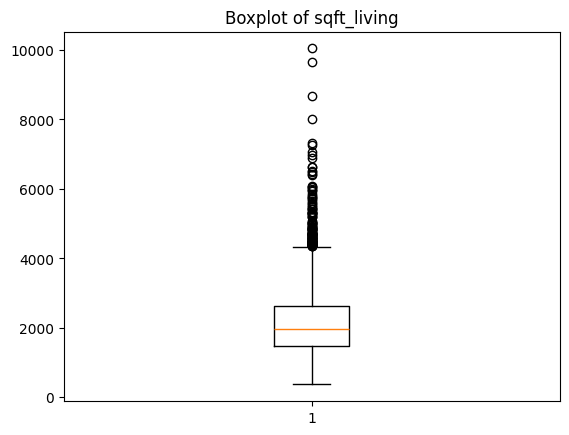

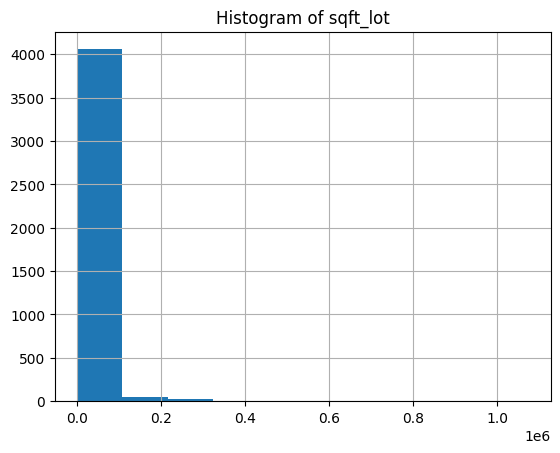

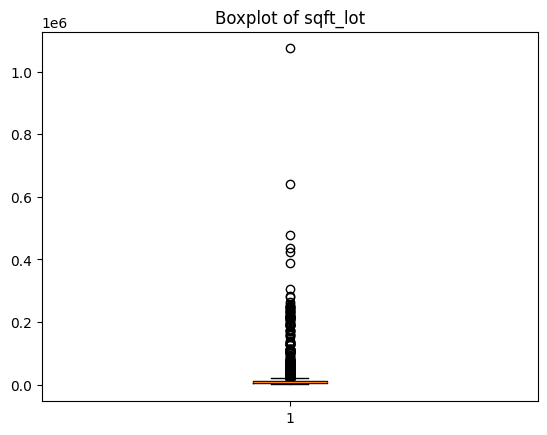

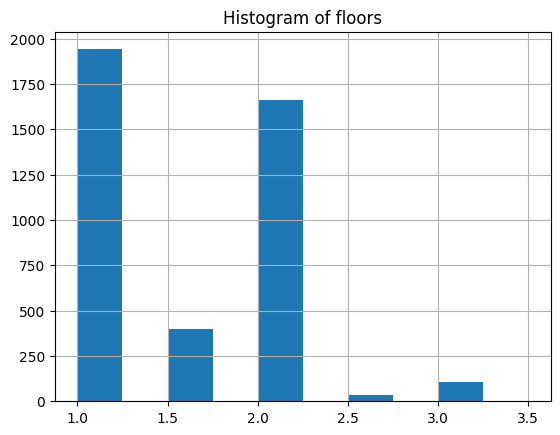

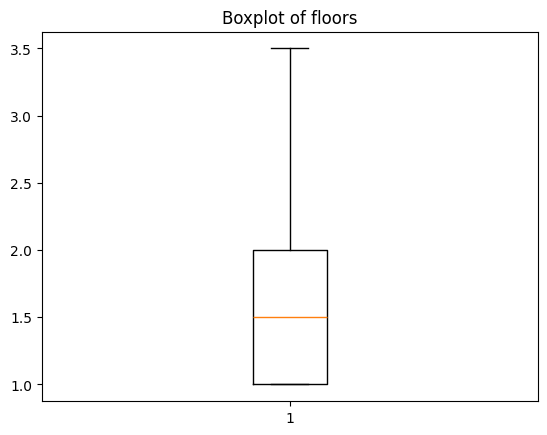

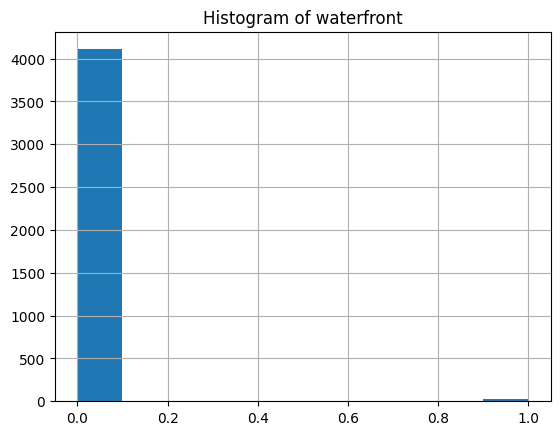

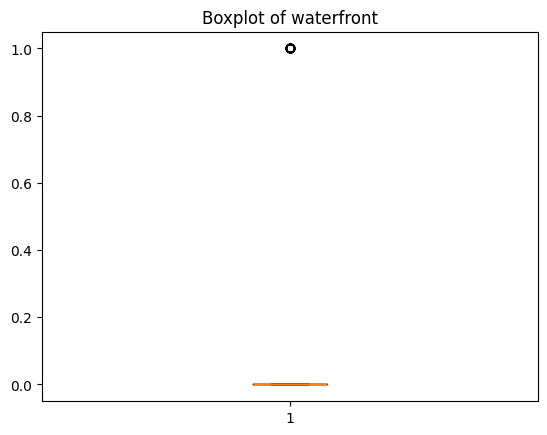

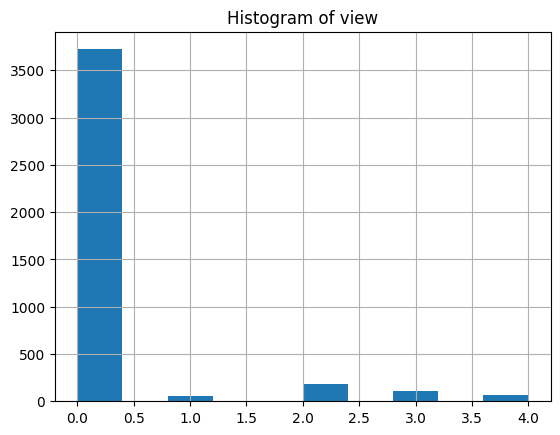

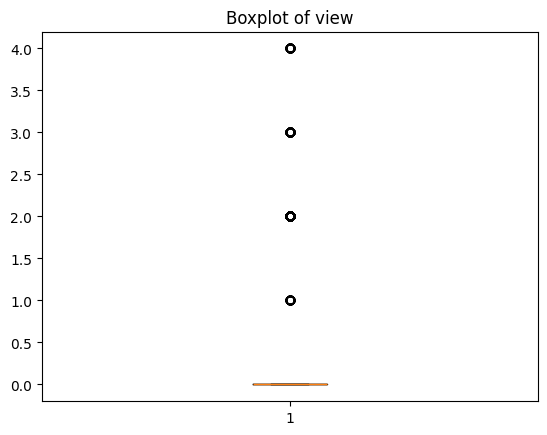

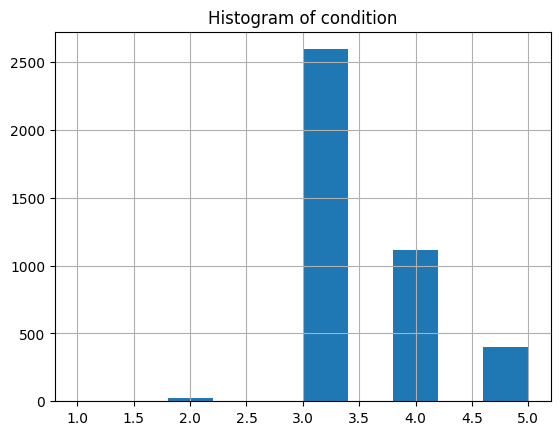

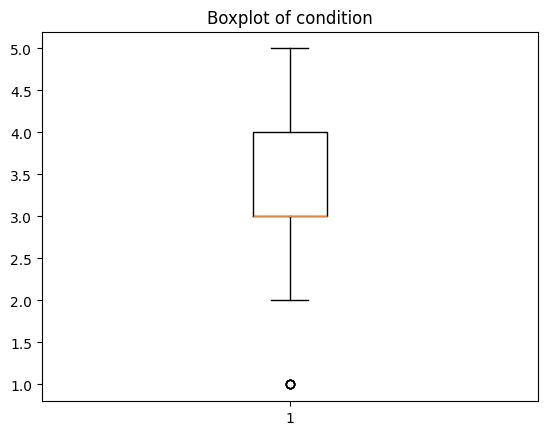

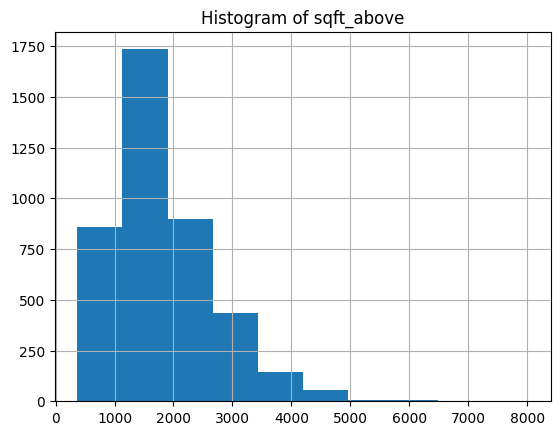

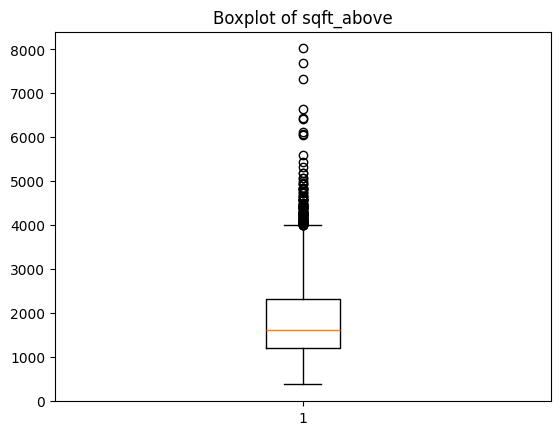

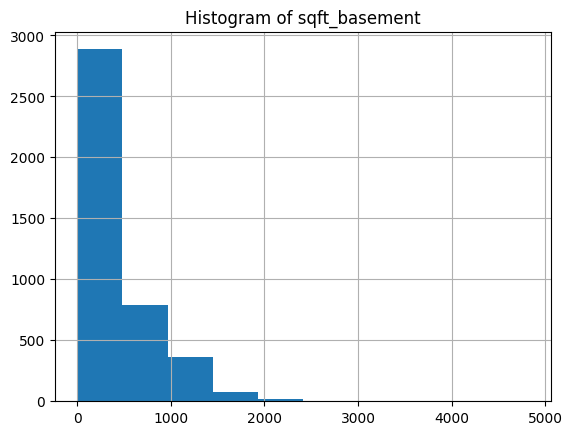

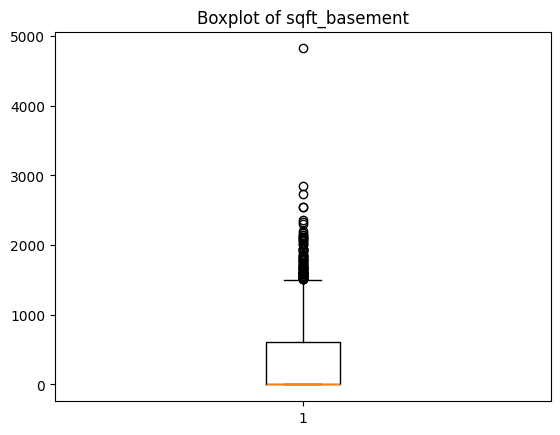

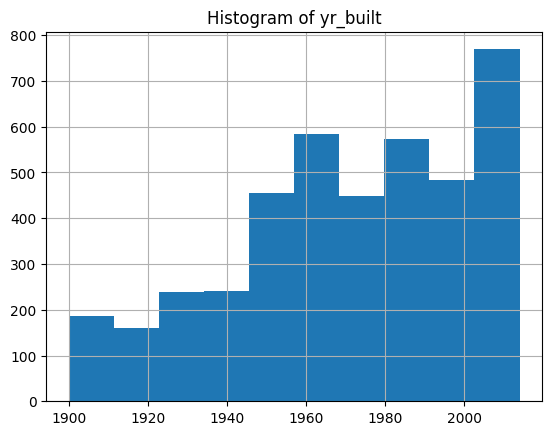

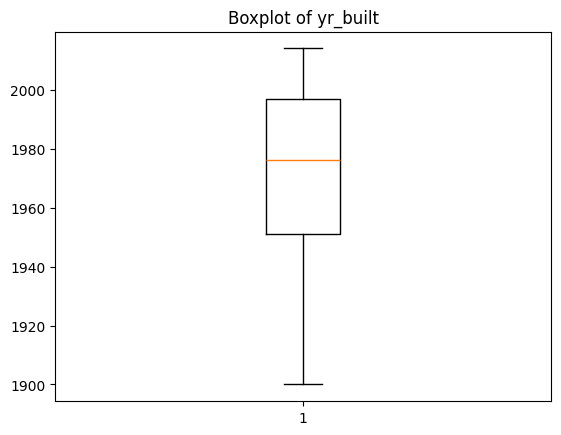

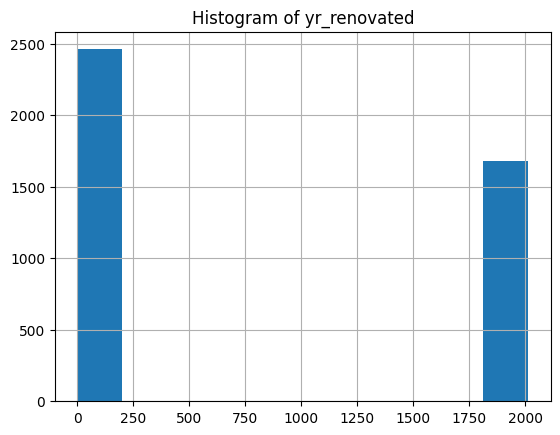

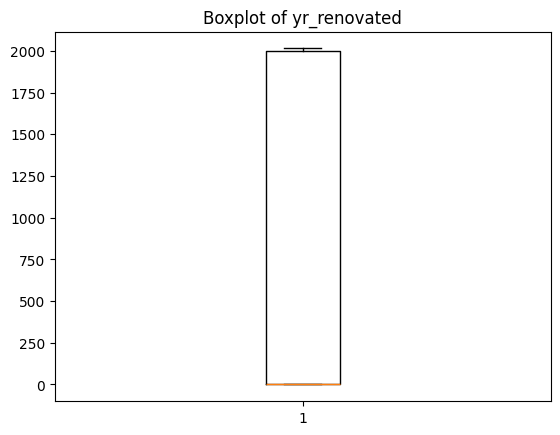

In [8]:

# Distribution plots
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure()
    df[col].hist()
    plt.title(f"Histogram of {col}")
    plt.show()

    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [9]:

# IQR Outlier Detection
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col + "_outlier"] = (df[col] < lower) | (df[col] > upper)

df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living_outlier,sqft_lot_outlier,floors_outlier,waterfront_outlier,view_outlier,condition_outlier,sqft_above_outlier,sqft_basement_outlier,yr_built_outlier,yr_renovated_outlier
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,...,False,False,False,False,False,False,False,False,False,False
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,...,False,True,False,False,False,False,False,False,False,False
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,...,True,True,False,False,False,False,True,False,False,False
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,...,False,False,False,False,False,False,False,False,False,False
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,...,False,False,False,False,False,False,False,False,False,False


In [10]:

# Remove rows with any outliers
cleaned_df = df[~df[[c for c in df.columns if c.endswith("_outlier")]].any(axis=1)]

cleaned_df.shape


(3106, 31)

In [11]:

# Correlation matrix
cleaned_df[numeric_cols].corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.255395,0.407712,0.565730,-0.029899,0.276566,NaN,NaN,0.049599,0.477430,0.161707,0.032556,-0.097125
bedrooms,0.255395,1.000000,0.475163,0.606409,0.207936,0.167174,NaN,NaN,0.009756,0.472528,0.244407,0.170231,-0.098591
bathrooms,0.407712,0.475163,1.000000,0.691970,-0.037872,0.531705,NaN,NaN,-0.169974,0.612173,0.146690,0.568233,-0.296713
sqft_living,0.565730,0.606409,0.691970,1.000000,0.213100,0.359478,NaN,NaN,-0.101584,0.847913,0.278601,0.347870,-0.177244
sqft_lot,-0.029899,0.207936,-0.037872,0.213100,1.000000,-0.320051,NaN,NaN,0.099677,0.192105,0.038691,-0.037666,0.078473
floors,0.276566,0.167174,0.531705,0.359478,-0.320051,1.000000,NaN,NaN,-0.317832,0.548496,-0.341324,0.514849,-0.265097
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.049599,0.009756,-0.169974,-0.101584,0.099677,-0.317832,NaN,NaN,1.000000,-0.233664,0.238965,-0.430715,-0.186490
sqft_above,0.477430,0.472528,0.612173,0.847913,0.192105,0.548496,NaN,NaN,-0.233664,1.000000,-0.272917,0.473308,-0.203464


In [12]:

# Export cleaned dataset
cleaned_df.to_csv("cleaned_dataset.csv", index=False)



## Conclusion
- EDA helped understand data distribution and relationships.
- IQR method was used to detect outliers.
- Extreme outliers were removed to improve analysis quality.
